| <font color='red'>Belangrijk!</font> |
|:---|
|Lees voor het maken de inleverinstructies door in de toetsbeschrijving (MS Teams, kanaal algemeen, tabje Moduledocumentatie).  Het niet opvolgen van deze instructies kan leiden tot een onvoldoende |



# Ga ik slagen voor Machine Learning?
Je begint nu een nieuwe module, machine learning. Op dit moment weet je nog weinig van het onderwerp af, maar dankzij machine learning kun je nu al, op basis van jouw geplande inzet,  voorspellen of je het vak gaat halen.

Laten we beginnen met de belangrijkste python machine learning modules te importeren. Het is good practise in python om al je import statements bovenaan de file te zetten, zodat je in 1 oogopslag kunt zien welke pakketten je voor deze file nodig hebt. Zo hoef je maar 1 keer door via de pakket installer de missende pakketten te installeren

In [1]:
import pandas as pd
import seaborn as sns

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


## 1. het stellen van de juiste vraag
De eerste stap in de machine learning workflow is het definieren van de onderzoeksvraag. 

### De onderzoeksvraag
Onze onderzoeksvraag is eigenlijk al gegeven:

    Ga ik de module machine learning halen?

Wat valt ons op aan deze vraag? 
Ten eerste, is het een classificatie probleem: de uitkomst is een categorie, je kan hem met 'ja' of 'nee' beantwoorden. 
Ten tweede, het gaat over jou: een student informatica aan de HS Leiden. 

Zoals je in de kennnisclips hebt gezien, hebben we oude data met de bijbehorende uitkomst nodig om een model te kunnen bouwen. We moeten dus andere studenten informatica van de HS Leiden vragen wat hun inzet was tijdens deze module en of ze het vak gehaald hebben of niet. 
Maar welke gegevens - variabelen genaamd - hebben we nodig?

### De onderzoeksvariabelen
In dit hoofdstuk gaan we de variabelen bepalen welke mede bepalen of je de module haalt of niet?  Op basis van wetenschappelijke literatuur [1] (ik haal voor het gemak 1 artikel aan, maar jullie kunnen er vast meer vinden), hebben we een aantal variabelen opgesteld die van invloed kunnen zijn op de hoogte van het cijfer. We hebben deze opgesomd in __tabel 1__.
We noemen dit de ___onafhankelijke variabelen___, omdat ze (tot op zekere hoogte) onafhankelijk van elkaar zijn.

Alle onafhankelijke variabelen voorspellen samen het resultaat: namelijk of de module gehaald wordt ja of nee. Dit resultaat is onze ___afhankelijke variabele___. De waarde van afhankelijke variabele wordt bepaald door (een combinatie van) de waarden van de onafhankelijke variabelen:
Bijvoorbeeld: de mate waarin je studeert voor deze module bepaald of je het vak gaat halen.

Gelukkig voor jullie hebben al meerdere studenten aan de HS Leiden de module Machine Learning gevolgd. We hebben al deze studenten via een enquete gevraagd de gegevens die volgens de literatuur van invloed kunnen zijn op het eindresultaat. Deze gegevens hebben we gecombineerd met de uitkomst voor de betreffende studenten. Deze staan in het .csv bestand "machine_learning_resultaat.csv". In __tabel 1__ staat de uitleg over de gegevens in die tabel. 

__Tabel 1:__ De variabelen voor halen van Machine Learning, de afhankelijke variabele staat met een * aangegeven. Dit is de waarde die we willen voorspellen voor nieuwe data.
<table>
    <tr>
        <th>Variabele</th>
        <th>kolomnaam</th>
        <th>Datatype</th>
        <th>Waarde</th>
    </tr>
    <tr>
        <td>Student</td>
        <td>Anoniem studentnummer</td>
        <td>int64</td>
        <td>Getal tussen de 0 en max aantal bevraagde studenten</td>
    </tr>
    <tr>
        <td>specialisatie</td>
        <td>De specialisatie die de student volgt</td>
        <td>object (string)</td>
        <td>"SE","FICT","BDAM","IAT"</td>
    </tr>
    <tr>
        <td>gemiste_WC</td>
        <td>Aantal gemiste werkcolleges Machine Learning</td>
        <td>int64</td>
        <td>"nul","een","twee","drie","vier","vijf","zes","zeven"</td>
    </tr>
    <tr>
        <td>vragen_stellen</td>
        <td>Student stelt vragen tijdens de les</td>
        <td>object (string)</td>
        <td>'nooit' 'weinig' 'gemiddeld' 'veel' 'vaak'</td>
    </tr>
    <tr>
        <td>interesse_ML</td>
        <td>Interesse in Machine Learning van student</td>
        <td>object (string)</td>
        <td>'geen' 'weinig' 'gemiddeld' 'veel' 'superveel'</td>
    </tr>
    <tr>
        <td>bestuderen_theorie</td>
        <td>Uren per week besteed aan leren theorie via kennisclips</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>oefenen_WC</td>
        <td>Uren per week besteed aan oefenen via werkcollege opdrachten</td>
        <td>int64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>voorkennis</td>
        <td>Het gemiddelde cijfer van de modules tot nu toe</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 10</td>
    </tr>
    <tr>
        <td>uren_bijbaan</td>
        <td>Uren per week besteed aan bijbaan</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>totale_tijd</td>
        <td>Gemiddelde studietijd voor module (in uren)</td>
        <td>Float64</td>
        <td>Getal tussen de 0 en 168(=24*7)</td>
    </tr>
    <tr>
        <td>gehaald</td>
        <td>Het resultaat voor de student</td>
        <td>object (string)</td>
        <td>"JA","NEE"</td>
    </tr>
</table>


Elke rij in deze tabel is het antwoord van 1 student. Deze rij heet een __feature vector__ en die bevat de eigenschappen voor die ene student. Het aantal rijen in de tabel is gelijk aan het aantal studenten die antwoord op onze enquete hebben gegeven. Als je de data gaat sorteren, zorg dat dat je alle kolommen sorteert, anders hussel je de antwoorden van de studenten door elkaar en is jouw data dus niks meer waard.

### <font color='red'>Opdracht</font> 
Deze opdracht gaat over validatie en bias:
1. Wat vindt je van bovenstaande dataset, zou deze data geschikt zijn om onze onderzoeksvraag te beantwoorden? Licht je antwoord toe. 
2. Als je kijkt naar jouw klasgenoten, zijn die representatief genoeg om een model op te bouwen? Een model wat voor _jou (als individue)_ een voorspelling gaat maken? (denk aan de reference man in het filmpje 'gevaren van een bias'). Waarom wel of waarom niet?

In [3]:
"De data geeft een beeld over hoe studenten die deze module al hebben gevolgd het vak hebben gehaald of niet. Ik vind deze data geschikt voor de onderzoeksvraag."

'De data geeft een beeld over hoe studenten die deze module al hebben gevolgd het vak hebben gehaald of niet. Ik vind deze data geschikt voor de onderzoeksvraag.'

In [4]:
"Mijn klasgenoten moeten het vak nog volgen dus is er nog geen data. Dus nee, ze zijn niet representatief genoeg om een model op te bouwen."

'Mijn klasgenoten moeten het vak nog volgen dus is er nog geen data. Dus nee, ze zijn niet representatief genoeg om een model op te bouwen.'

## 2. Data voorbereiding
Allereerst gaan we de dataset inladen en kijken waar we mee te maken hebben. 

### inlezen data
Hieronder zie je een voorgedefinieerde variabele en een voorgedefinieerde functie. Verander de naam van dit soort variabelen en functies niet. We roepen deze functie aan in codegrade om jouw code uit te voeren en te testen op functionele correctheid. De waarden en de inhoud van de functie kun je natuurlijk wel aanpassen naar wat er gevraagd wordt.

Ook vragen we je objecten van een bepaald type op te leveren. Met de functie ```type``` functie kun je het datatype van de variabele opvragen op om te controleren of het van het juiste type is.


### <font color='red'>Opdracht</font> 
Zet in onderstaande variabele ```pad_naar_file``` het pad naar jouw dataset. Dit kan een relatief of een absoluut pad zijn. De output van de variabele moet van het type String (str) zijn.

Maak daarna de functie ```read_data``` af. De functie krijgt een string met de filelokatie als input, leest deze in en geeft een pandas dataframe terug.

De input variabele:

    csv_file: het relatieve of absolute pad naar de csv file, datatype str

De output:

    dataframe: de inhoud van de csv file het type Pandas Dataframe

In [5]:
pad_naar_file = "imal_student_enquete.csv"
type(pad_naar_file)

str

In [6]:
def read_data(csv_file):
    dataframe = pd.read_csv(csv_file)
    

    return dataframe

In [7]:
#hier wordt jouw functie aangeroepen en bevat df nu het dataframe
df = read_data(pad_naar_file);

Controleer of de output inderdaad een dataframe van de module pandas is:

In [8]:
type(df)

pandas.core.frame.DataFrame

### sneak peak data
Als eerste gaan we kijken met wat voor data we te maken hebben:

### <font color='red'>Opdracht</font> 
Schrijf hieronder de code om meer informatie over de data te krijgen. Je schrijft per cel de gevraagde functie


Het zinnigste commando is de ```df.info()``` functie. Hiermee krijg je per kolom een overzicht van de het aantal elementen in de tabel en per kolom de naam, aantal nul-waarden, en het data type van de gegevens in de tabel. 

In [9]:
df.info(read_data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   student             750 non-null    int64  
 1   gehaald             750 non-null    object 
 2   specialisatie       750 non-null    object 
 3   gemiste_WC          741 non-null    object 
 4   vragen_stellen      743 non-null    object 
 5   interesse_ML        745 non-null    object 
 6   bestuderen_theorie  739 non-null    float64
 7   oefenen_WC          748 non-null    float64
 8   voorkennis          746 non-null    float64
 9   uren_bijbaan        721 non-null    float64
 10  totale_tijd         743 non-null    float64
dtypes: float64(5), int64(1), object(5)
memory usage: 64.6+ KB


Daarna gaan we kijken naar de waardes in de tabel. Je kan bijvoorbeeld de 5 eerste of laatste rijen uitprinten door de  ```head(5)``` of  ```tail(5)``` functie te gebruiken.

In [10]:
df.head(7)

,student,gehaald,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd
0,1,NEE,SE,twee,nooit,veel,3.2,3.6,5.5,3.1,6.8
1,2,JA,FICT,nul,NaN,weinig,2.2,2.0,5.9,4.7,4.4
2,3,NEE,FICT,zes,veel,gemiddeld,0.9,0.9,6.0,4.7,2.3
3,4,JA,SE,twee,vaak,geen,3.6,4.1,7.2,5.5,8.5
4,5,JA,SE,zeven,gemiddeld,superveel,0.3,1.0,6.5,4.4,1.8
5,6,JA,IAT,nul,veel,veel,3.9,3.1,6.6,4.7,7.7
6,7,NEE,SE,zeven,vaak,veel,1.0,0.5,5.5,4.7,1.9


Vervolgens is het fijn om te weten wat de beschrijvende statistieken zijn van onze numerieke waarden, gelukkig kunnen we die heel gemakkelijk opvragen met de  ```describe()``` functie.

In [11]:
df.describe()

,student,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd
count,750.00000,739.000000,748.000000,746.000000,721.000000,743.000000
mean,375.50000,2.995535,2.927674,6.374799,4.041609,6.432301
std,216.65064,1.380593,1.359570,0.620680,0.948311,2.687358
min,1.00000,0.000000,0.000000,5.500000,0.700000,0.200000
25%,188.25000,2.100000,2.100000,5.800000,3.400000,4.850000
50%,375.50000,3.300000,3.200000,6.400000,4.000000,7.000000
75%,562.75000,4.000000,3.900000,6.800000,4.700000,8.500000
max,750.00000,5.800000,5.900000,8.500000,7.000000,11.900000


Met de unique functie kun je vervolgens kijken wat de unieke waarden van de kolommen met tekst zijn, bijvoorbeeld:

    df['gehaald'].unique()

In [12]:
df['voorkennis'].unique()

array([5.5, 5.9, 6. , 7.2, 6.5, 6.6, 6.3, 7. , 6.9, 5.6, 6.2, 6.1, 7.7,
       5.8, 7.3, 5.7, 7.4, 6.7, nan, 6.4, 7.5, 6.8, 7.1, 8.5, 7.6, 8. ,
       7.9, 7.8, 8.3])

### visualisatie data

#### numerieke waarden
Als eerste willen we kijken hoe de numerieke waarden verdeeld zijn en zich ten opzichte van elkaar verhouden. We kijken dus naar correlatie, spreiding en covariantie. Hiervoor gebruiken we de pairplot van Seaborn.

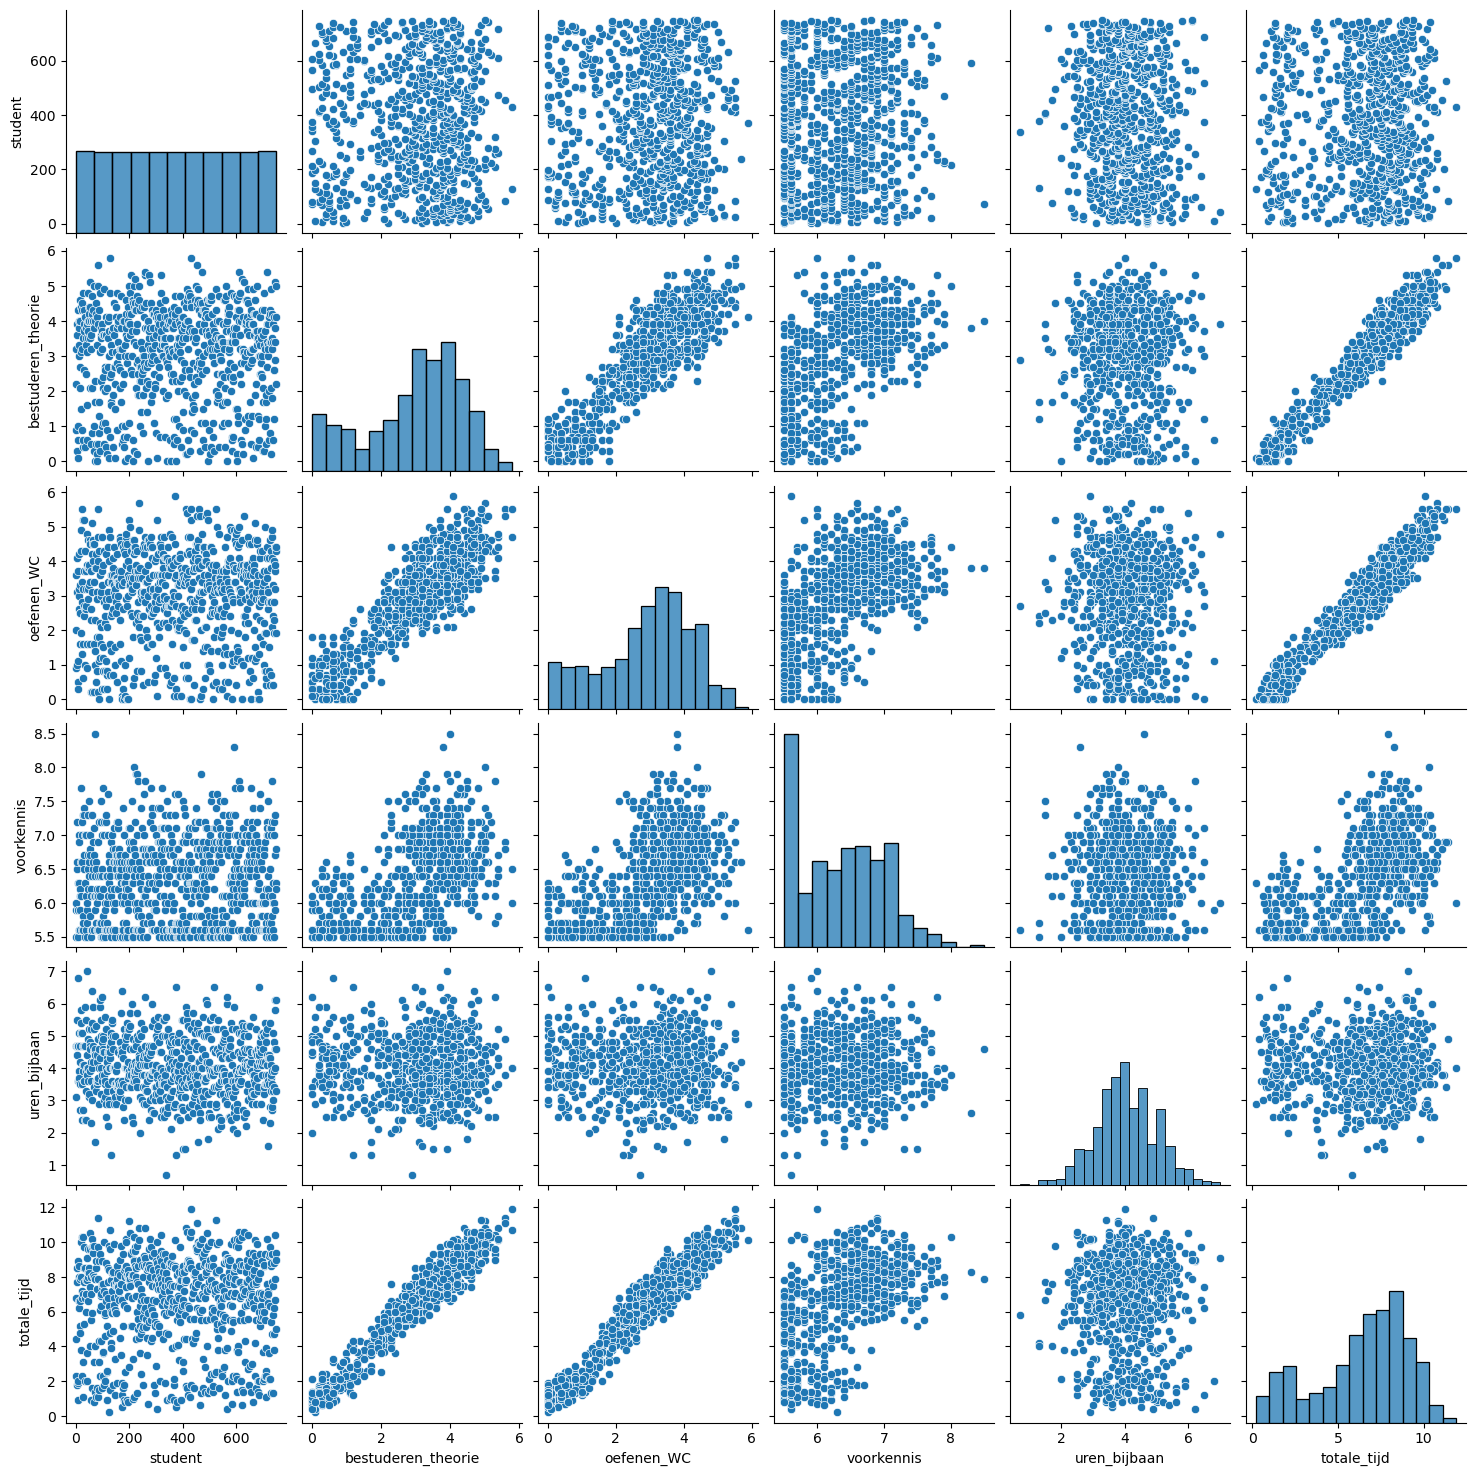

In [13]:
import seaborn as sns
sns.pairplot(df, height=2.5)

Cateogrische data kunnen we visualiseren met een pairplot. Zo zien we hoe de data per categorie verdeeld is

In [14]:
sns.countplot(x='gehaald', data=df)

<AxesSubplot:xlabel='gehaald', ylabel='count'>

### voorbewerken data 

#### null waarden
We hebben al via de info functie gezien dat er missende waarden waren in de data. Die gaan we nu vervangen. 

Hiervoor gaan we gebruik maken van de pandas functie ```fillna(<waarde>)```. Afhankelijk van je data ga je de missende data vervangen met de mean, median, modus (most_frequent) of een zelfgekozen constante waarde. Je kan er natuurlijk ook voor kiezen om alle rijen (of zelfs de kolom) met NaN weg te gooien, dit is eigenlijk pas een optie als meer dan 5% van de data mist of als de missende data niet random mist. 

Grofweg gezegd zijn dit jouw keuzes:
* categorische data: modus
* numerieke data, normaal verdeeld: mean
* numerieke data, normaal verdeeld: median
* mist meer dan 5% van de data: niet vervangen, kolom niet gebruiken

We kunnen de modus, meadian of mean gemakkelijk voor een kolom opvragen via de functies:
* ```dataframe['kolomnaam'].median()```
* ```dataframe['kolomnaam'].mean()```
* ```dataframe['kolomnaam'].mode()```

Als we bijvoorbeeld alle NaN waarden van de kolom _uren_bijbaan_ willen vervangen door de median, ziet de code er zo uit:

    dataframe['uren_bijbaan'].fillna( dataframe['uren_bijbaan'].median() , inplace=True )

Voor de modus wordt berekend op de volgende wijze:

    dataframe['gemiste_WC'].fillna(dataframe['gemiste_WC'].mode()[0], inplace=True)

Je ziet dat er na de mode() een [0] staat, dit komt doordat de mode() functie een panda Series teruggeef. De  fillna verwacht een string. Door de [0] te gebruiken, wordt het eerste element uit de serie teruggegeven. 

### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```vervang_nan``` af. Deze functie krijgt een dataframe en vervangt de NaN met een goede vervangende waarde in de kolommen 'vragen_stellen', 'interesse_ML', 'bestuderen_theorie', 'oefenen_WC', 'voorkennis', 'totale_tijd', 'gemiste_WC' en 'uren_bijbaan'

De input variabele:

    dataframe: een Pandas dataframe met gegevens van Machine Learning studenten, inclusief nullwaarden

De output:

    dataframe:  een dataframe waarbij alle nullwaarden zijn vervangen door zinnige  waarden.

In [15]:
def vervang_nan(dataframe):
  
    dataframe['student'].fillna(dataframe['student'].mode()[0], inplace=True)
    dataframe['gehaald'].fillna(dataframe['gehaald'].mode()[0], inplace=True)
    dataframe['specialisatie'].fillna(dataframe['specialisatie'].mode()[0], inplace=True)
    dataframe['bestuderen_theorie'].fillna(dataframe['bestuderen_theorie'].mode()[0], inplace=True)
    dataframe['vragen_stellen'].fillna(dataframe['vragen_stellen'].mode()[0], inplace=True)
    dataframe['oefenen_WC'].fillna(dataframe['oefenen_WC'].mode()[0], inplace=True)
    dataframe['interesse_ML'].fillna(dataframe['interesse_ML'].mode()[0], inplace=True)
    dataframe['voorkennis'].fillna(dataframe['voorkennis'].mode()[0], inplace=True)
    dataframe['gemiste_WC'].fillna(dataframe['gemiste_WC'].mode()[0], inplace=True)
    dataframe['uren_bijbaan'].fillna(dataframe['uren_bijbaan'].median(), inplace=True)
    dataframe['totale_tijd'].fillna(dataframe['totale_tijd'].median(), inplace=True)
    
    return dataframe

Laten we nu controleren of het werkt. Onderstaande code roept jouw functie aan en kijkt daarna of alle nullwaarden zijn vervangen. In pandas kun je de functie ```is.null```  gebruiken om te testen of een cel een NaN waarde heeft of niet. Vervolgens kun je die waarden optellen per rij (axis=1) of kolom (axis=0) . Het optellem per kolom is meestal het zinnigste om te doen:

In [16]:
df = vervang_nan(df)
df.isnull().sum(axis = 0) 

student               0
gehaald               0
specialisatie         0
gemiste_WC            0
vragen_stellen        0
interesse_ML          0
bestuderen_theorie    0
oefenen_WC            0
voorkennis            0
uren_bijbaan          0
totale_tijd           0
dtype: int64

#### Vervang namen categorische data

Zoals we in de verkendende stap gezien hebben, bevat de dataset categorische data van het datatype string. Voor machine learning moeten we die omzetten naar getallen. 

We maken voor elke colomn met getallen een dictionary met het label en een opvolgend nummer (weet je nog dat je ```unique``` kan gebruiken om de waarden op te vragen?). Door de functie ```map``` worden alle elementen met dezelfde label als de key vervangen door de value. Hieronder zie je code voor de kolom 'gehaald'. 

    set_gehaald = {'NEE':0, 'JA':1}
    df['gehaald'] = df['gehaald'].map(set_gehaald)

__LET OP: als een waarde in jouw dataset niet in de set staat, wordt de waarde omgezet naar NaN. Dit betekent dat als je de code 2x runt, jouw hele dataset op NaN wordt gezet en je jouw data opnieuw moet laden!__

In [17]:
# run deze code apart. 
print(df['gehaald'].unique())
set_gehaald = {'NEE':0, 'JA':1}
df['gehaald'] = df['gehaald'].map(set_gehaald)
print(df['gehaald'].unique())

['NEE' 'JA']
[0 1]


### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```vervang_categorienaam``` af, welke een dataframe met de kolommen 'gemiste_WC', 'specialisatie','interesse_ML' en 'vragen_stellen' als input verwacht. De output is een dataframe waarvan de eerstgenoemde kolommen zijn omgezet naar nummers. 

De input variabele:

    dataframe: een Pandas dataframe met gegevens van Machine Learning studenten inclusief strings voor categorie data

De output:

    dataframe:  een dataframe waarbij alle strings van categorien zijn vervangen door nummers.

In [18]:
print(df['gemiste_WC'].unique())
print(df['specialisatie'].unique())
print(df['interesse_ML'].unique())
print(df['vragen_stellen'].unique())

['twee' 'nul' 'zes' 'zeven' 'een' 'drie' 'vier' 'vijf']
['SE' 'FICT' 'IAT' 'BDAM']
['veel' 'weinig' 'gemiddeld' 'geen' 'superveel']
['nooit' 'weinig' 'veel' 'vaak' 'gemiddeld']


In [19]:
def vervang_categorienaam(dataframe):
       
    set_wc = {'nul':0,'een':1, 'twee':2, 'drie':3, 'vier':4, 'vijf':5, 'zes':6, 'zeven':7}
    dataframe['gemiste_WC'] = dataframe['gemiste_WC'].map(set_wc)

    #zet de juiste code bij de volgende variabelen om de categorien bij "specialisatie", "interesse_ML" en "vragen_stellen" te vervangen
    
    set_namen = {'SE':0,'IAT':1, 'FICT':2, 'BDAM':3}
    dataframe['specialisatie'] = dataframe['specialisatie'].map(set_namen)
    
    set_interesse = {'superveel':0,'veel':1, 'gemiddeld':2, 'weinig':3, 'geen':4}
    dataframe['interesse_ML'] = dataframe['interesse_ML'].map(set_interesse)
 
    set_vragen = {'veel':0,'vaak':1, 'gemiddeld':2, 'weinig':3, 'nooit':4}
    dataframe['vragen_stellen'] = dataframe['vragen_stellen'].map(set_vragen)
    

    
    return dataframe

In [20]:
#roept de functie aan op ons dataframe, daarna controleren we de data door even naar een aantal rijen te kijken
df = vervang_categorienaam(df)
df.tail(5)

,student,gehaald,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd
745,746,1,1,1,0,4,3.4,3.7,6.7,5.8,7.0
746,747,1,0,0,1,2,3.8,3.9,6.7,6.1,7.9
747,748,0,1,4,1,4,2.2,1.9,6.3,4.6,5.0
748,749,1,0,0,4,1,5.0,4.3,6.8,3.3,9.4
749,750,1,2,2,1,0,4.1,4.4,6.2,6.1,9.0


#### Splits je dataset tussen onhankelijke en afhankelijke variabelen

Nu we weten wat er in de dataset zit, gaan we als eerste de afhankelijke variabele (de uitkomst, dus of de module is gehaald) en onafhankelijke data (de andere kolommen) splitsen. Zo kunnen we het machine learing model kunnen leren wat voor data het als input kan verwachten en wat voor data hij moet voorspellen.

In Machine learning gebruiken we de de letter ```x``` om de onafhankelijke waarden aan te geven en de letter  ```y``` voor de afhankelijke waarden. Ook belangrijk is het om te weten dat als er een hoofdletter gebruikt wordt, dan is het datatype een dataframe(een matrix) en bevat de tabel meerdere rijen en kolommen. Als we een kleine letter gebruiken, dan gaat het om een serie: 1 kolom met meerdere rijen. 

In [21]:
print(df.columns)
print(df.shape)

Index(['student', 'gehaald', 'specialisatie', 'gemiste_WC', 'vragen_stellen',
       'interesse_ML', 'bestuderen_theorie', 'oefenen_WC', 'voorkennis',
       'uren_bijbaan', 'totale_tijd'],
      dtype='object')
(750, 11)


Eerst stoppen we de afhankelijke variabele (kolom 'gehaald') in y en vervolgens gebruiken de functie ```drop``` in combinate met axis=1 (om aan te geven dat we een kolom weggooien) om de kolom 'gehaald' uit het gehele dataframe te halen. Vervolgens stoppen we die in X.


In [22]:
y = df['gehaald']
print(y.shape)

X = df.drop(['gehaald'], axis=1)
print(X.shape)

(750,)
(750, 10)


#### verwijder kolommen die niks bijdragen
Er zijn verschillende manieren waarop kolommen niet kunnen bijdragen. Hieronder noemen we de 2 meestvoorkomende:


<font color='red'>__identificatie nummers__</font>

Kolommen met identificatie nummers verwijderen we. We willen voorkomen dat het algoritme dat wel denkt, dus daarom verwijderen we die kolom.
We gaan ervanuitgaan dat jouw studentnummer geen invloed heeft op jouw eindcijfer, dus verwijderen we de kolom ```student```.

<font color='red'>__correlaties__</font>

Hiervoor kijken we naar de kolommen die hoog met elkaar gecorreleerd zijn. Als 2 variabelen gecorreleerd zijn, zal de waarde van de ene variabele meeveranderen als de andere waarde andere variabele wordt aangepast. 

Een voorbeeld hiervan is lengte en gewicht van personen (zonder overgewicht). Als zo iemand langer is, zal zijn gewicht meestal ook hoger zijn dan een klein persoon. Een klein persoon heeft vaak een lager gewicht. We zeggen in dit geval dat lengte en gewicht gecorreleerd aan elkaar zijn. 

In bovenstaand voorbeeld is de correlatie _positief_: Als de ene variabele groter wordt, wordt de andere variabele ook groter. Een _negatieve_ correlatie houdt in dat de ene variabele kleiner wordt, als de andere variabele groter wordt. Een voorbeeld is hoogte en temperatuur; hoe hoger je komt hoe lager de temperatuur wordt.

Een correlatiewaarde van 0 betekent dat de waarden niet gecorreleerd zijn, een waarde van 1 of -1 betekent maximale positieve of negatieve correlatie. Als je meer wilt weten over correlatie, kijk dan naar de kennisclip "Beschrijvende statistiek (optioneel)", daar wordt dit uitgebreider uitgelegd.

De correlatie tussen variabelen in een dataframe, kan worden berekend met de functie ```corr()```. Dat levert echter alleen cijfers op, door die cijfers in een heatmap te stoppen, zien we meteen welke variabelen hoog met elkaar gecorreleerd zijn.

In [23]:
sns.heatmap(X.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

Je wilt correlatie binnen jouw dataset zo veel mogelijk vermijden. Sterk gecorreleerde waarden voegen niks toe en kunnen beter worden verwijderd. Er is geen vastomlijnde regel wanneer je een kolom verwijdert of niet. Dit heeft ook sterk met de variabelen in je dataset te maken en wat ze voor het geheel betekenen. 

In deze module volgen we de volgende _'rule of thumb'_ aan dat kolommen met een hoge correlatie (hoger dan 0.7 of lager dan -0.7) worden verwijderd. 

Als je moet kiezen welke kolom te verwijderen, hou dan de volgende regels aan:
 - Probeer _zo veel mogelijk kolommen_ te verwijderen.  Bijvoorbeeld: 'totale tijd' is gecorreleerd aan 2 andere kolommen: 'gemiste_WC' en 'oefenen_WC'. Dan haal je de 2 kolommen weg en en laat je 'totale_tijd' staan. 
 - Behoud zo veel mogelijk _de numerieke kolommen_. Als een kolom met categorische data gecorreleerd is aan eentje met numerieke data, kies je ervoor de kolom met numerieke data te behouden en de categorische data te verwijderen. In de hoop dat je voorspelling accurater wordt.


Als we naar de correlatiematrix kijken, zien we dat er een hoge correlatie te zien is tussen ```totale_tijd``` met ```bestuderen_theorie``` en ```oefenen_wc```. Omdat beide kolommen ook een hoge omgekeerde correlatie laat zien met ```gemiste_WC```, gaan we die 2 kolommen verwijderen. 
Dit doen we weer met de functie ```drop```


### <font color='red'>Opdracht</font> 
Maak onderstaande functie ```verwijder_correlaties``` af, welke een dataframe met in elk geval de kolommen'student','bestuderen_theorie', en 'oefenen_WC' als input verwacht. De output is een dataframe waarvan de eerstgenoemde kolommen zijn verwijderd. 

De input variabele:

    dataframe: een Pandas dataframe met de kolommen 'student', 'bestuderen_theorie' en 'oefenen_WC'
    

De output:

    dataframe:  een Pandas dataframe zonder de kolommen 'student', 'bestuderen_theorie' en 'oefenen_WC'

In [24]:
def verwijder_correlaties(dataframe):

    #zet hier jouw code om de kolommen te verwijderen  
    dataframe.drop('student', inplace=True, axis=1)
    dataframe.drop('bestuderen_theorie', inplace=True, axis=1)
    dataframe.drop('oefenen_WC', inplace=True, axis=1)
    
    return dataframe

In [25]:
X = verwijder_correlaties(X)
sns.heatmap(X.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

<AxesSubplot:>

In [26]:
print(X.shape)

(750, 7)


#### Standardize
Zoals je hebt kunnen zien, hebben de variabelen verschillende waarden. Om ervoor te zorgen dat alle variabelen evenzwaar in onze voorspelling worden meegenomen, schalen we alle variabelen tot het gemiddelde op de 0 ligt met een standaarddeviate van 1.Dit proces heet standaardizeren. 

Voor sommige algoritmen en technieken, kan deze stap worden overgeslagen. Voor andere algoritmen is het standaardizeren noodzakelijk. Omdat deze stap verder geen invloed heeft op de data, is het _good practice_ deze stap altijd uit te voeren. Tenzij je een goede reden hebt om het niet te doen. 

Nu wordt alleen de onafhankelijke variabelen gestandaardiseerd. Je kan er ook voor kiezen om de afhankelijke waarden te schalen. Dit doen we bijvoorbeeld als we regressie behandelen. We laten dan ook zien hoe je de waarden weer kan terugrekenen naar de oorspronkelijke data. 

Om te schalen maken we gebruik van een Standaardscaler object van de sklearn module aan: ```scaler = StandardScaler()```. Dit object zorgt ervoor dat al onze data in 1 stap op de juiste manier gestandaardiseerd wordt. 

Door de functie fit op de scaler aan te roepen (```scaler.fit(dataframe)```), wordt berekend hoe elke kolom gestandaardiseerd moet worden. 
Met de functie ```scalar.transform(dataframe)``` wordt vervolgens de berekende standaardisatie op elke dataset, dus ook nieuwe data, toegepast. 


### <font color='red'>Opdracht</font> 
1. Schrijf de code om een scaler object van het type StandardScaler van de module aan te maken
2. Leer de scaler object hoe data van deze dataset gestandaardiseerd moet worden.



In [27]:
scaler = StandardScaler()

scaler.fit(df)

type(scaler)

sklearn.preprocessing._data.StandardScaler

De dataset kan nu gestandaardiseerd worden door gebruik te maken van het aangemaakte scaler object. Echter hier moeten we nog een extra stap doen: de transform geeft een dataset van het type numpy array terug. 

Die gaan we weer omzetten naar een pandas DataFrame met de juiste kolomnamen voor onze eigen interpretatie:

In [28]:
col_names= list(df.columns)
print(col_names)
df = pd.DataFrame(scaler.transform(df), columns=col_names)

['student', 'gehaald', 'specialisatie', 'gemiste_WC', 'vragen_stellen', 'interesse_ML', 'bestuderen_theorie', 'oefenen_WC', 'voorkennis', 'uren_bijbaan', 'totale_tijd']


Met de describe functie kun je zien dat van alle variabelen nu het gemiddelde op de 0 ligt en een standaarddeviate van 1 heeft.

Een getal met daarin een _e tot een groot negatief geta;_ is een wiskundige notatie wat aangeeft dat het getal heel dicht tegen nul aanzit, maar nog net geen 0 is. Lees meer hierover in https://www.examenoverzicht.nl/wiskunde/machtsverbanden (helemaal onderaan)

Bijvoorbeeld: 3e-17 op je (wetenschappelijke)rekenmachine is 3*exp(-17) =  0,00000000000000003

In [29]:
df.describe()

,student,gehaald,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd
count,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02,7.500000e+02
mean,-1.332268e-17,3.167836e-17,-8.911390e-17,1.972496e-16,4.603725e-17,3.375078e-17,4.662937e-17,1.210883e-16,-1.063594e-16,-4.736952e-18,9.962401e-17
std,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00,1.000667e+00
min,-1.729743e+00,-1.299297e+00,-9.891760e-01,-1.156482e+00,-1.473929e+00,-1.366238e+00,-2.190109e+00,-2.158283e+00,-1.401643e+00,-3.594544e+00,-2.333083e+00
25%,-8.648715e-01,-1.299297e+00,-9.891760e-01,-7.082330e-01,-7.504690e-01,-6.610224e-01,-6.433189e-01,-6.108273e-01,-9.186876e-01,-6.618696e-01,-5.657658e-01
50%,0.000000e+00,7.696471e-01,-1.383939e-01,-2.599843e-01,-2.700917e-02,4.419353e-02,2.119648e-01,1.997446e-01,4.722226e-02,-4.304843e-02,2.103575e-01
75%,8.648715e-01,7.696471e-01,7.123882e-01,6.365132e-01,6.964506e-01,7.494094e-01,7.214955e-01,7.155631e-01,6.911622e-01,7.102991e-01,7.714104e-01
max,1.729743e+00,7.696471e-01,1.563170e+00,1.981259e+00,1.419910e+00,1.454625e+00,2.031717e+00,2.189330e+00,3.427907e+00,3.185584e+00,2.043130e+00


#### Split de dataset

We gaan nu de dataset splitsen. Een deel, 70%, gaan we gebruiken om het model te trainen. De overige 30% wordt onze testdata. Die gebruiken we op het einde om te kijken of het model ook goed werkt op data die het nog niet eerder gezien heeft. 

Zo kunnen we controleren of er geen __overfitting__ of __underfitting__ heeft plaatsgevonden.

De teruggegeven variabelen zijn:

    X_train:  de onafhankelijke variabelen van de trainingsset
    y_train:  de afhankelijke variabelen van de trainingsset
    X_test:   de onafhankelijke variabelen van de testset
    y_test:   de afhankelijke variabelen van de testset


In [30]:
percentage_test_data = 0.30

#de random_state zorgt ervoor dat de data elke keer opdezelfde manier wordt gesplitst. 
#Dit wordt gebruikt voor codegrade, verander deze waarde dus niet, 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentage_test_data, random_state=42)

In [31]:
print(f"formaat X_train {X_train.shape}")
print(f"formaat y_train {y_train.shape}")
print(f"formaat X_test  {X_test.shape}")
print(f"formaat y_test  {y_test.shape}")


formaat X_train (525, 7)
formaat y_train (525,)
formaat X_test  (225, 7)
formaat y_test  (225,)


De trainingsset bevat nu 525 studenten en de testset bevat er 225.

## 3. Algoritme kiezen
Ik heb voor deze opdracht voor jullie alvast een algoritme gekozen. De komende werkcolleges maken jullie kennis met de verschillende algoritmes en verschillende maten om te controleren hoe goed het model past. Hier leg ik alleen de algemene structuur uit voor deze algoritmes. Die zijn namelijk voor alle algoritmes van de module SKLEARN hetzelfde.

De constructor maakt een algemeen machine learning algoritme aan. Dit noemen we het model. Het algoritme wat we hier gebruiken is een Gaussian Naive Bayes-model, daar leer je in week 4 meer over.  


In [32]:
# maakt Gaussian Naive Bayes-model object en train het met de data
model = GaussianNB()
type(model)

sklearn.naive_bayes.GaussianNB

## 4. Model trainen

Nu gaan we het algoritme de oude data en de bekende uitkomsten voeren: Dit noemen we de trainingsdata. Elk sklearn machine learning algortime leert via de functie ```fit(onafhankelijke_data, afhankelijke_data)```:

In [33]:
model.fit(X_train, y_train)

GaussianNB()

Dat ging snel! Het model is nu getraind en kan op basis van data een uitkomst voorspellen. Dit doen we via de functie ```predict(onafhankelijke_data)```. Het algoritme geeft dan per featurevector (dus per rij) een voorspelling of die student het vak machine learning gaat halen. Dit resultaat is van het type ndarray van de module numpy.

In [34]:
# waarden voorspellen met behulp van de trainings data
resultaat = model.predict(X_train)
type(resultaat)

numpy.ndarray

Mooi, nu gaan we bekijken hoe goed het model heeft gewerkt voor onze trainingsdata. Dit doen we door gebruik te maken van de accuracy: Deze metric (maat) geeft het percentage goed voorspelde studenten terug als een float. 

In [35]:
metrics.accuracy_score(y_train, resultaat)

0.7542857142857143

Op basis van deze resultaten kunnen we zeggen dat ongeveer 75% van de studenten goed is voorspeld door het model. Niet slecht! Dit is een acceptabel percentage. Mocht het niet acceptabel zijn, dan zouden we nu aantal stappen teruggaan om meer of betere data te verzamelen of om een ander Machine Learning model te kiezen. 

## 5. Model testen
Tijd om te kijken of ons model ook een voorspelling kan doen voor data die hij nog niet gezien heeft. 

### <font color='red'>Opdracht</font> 
1. Schrijf de code om het model de onafhankelijke variabelen te voeren, dit die je via de functie ```predict``` op dezelfde wijze als met de trainingsdata. Stop het resultaat in de variabele test_resultaat. Deze variabele is dus van het type ndarray.
2. Bereken net zoals met de trainigsdata gebeurde, ook de accuracy voor de testdata. 

In [36]:
test_resultaat =  model.predict(X_test)

In [37]:
metrics.accuracy_score(y_test, test_resultaat)

0.8

Op de testdata doet het model het dus beter dan de trainingsdata en kan het van 80% van de studenten goed voorspellen of die de module wel of niet gaan halen.

## Conclusie
Nu we al die moeite hebben gedaan, is het tijd om onze onderzoeksvraag te beantwoorden. 

    Ga ik de module machine learning halen?

Daarom ga je nu jouw eigen gegevens in het getrainde machine learning algoritme zetten. Bedenk op basis van eerdere modules en de modules die je nu volgt hoeveel tijd je aan machine learning denkt te gaan besteden, vul die in in het model en we zullen zien of je het gaat halen of niet. 

### <font color='red'>Opdracht</font> 
In onderstaand dictionary staan alle kolommen van onze dataset. Verander onderstaande data in elke kolom, zoals jij denkt de module te gaan aanvliegen: hoeveel werkcolleges denk je te gaan missen, hoeveel uren ga je per week aan Machine learning besteden, etc.  
Ter info voor jou: Gemiddeld zijn er 2 tot 3 uur videocolleges per week om te bestuderen.

Jouw gegevens gaan we dan als nieuwe data aan het model geven en bekijken of het algoritme denkt dat je met jouw planning deze module gaat halen. 

In [38]:
jouwdata = {'student': 572,
            'specialisatie': 'SE' ,      #['SE' 'FICT' 'IAT' 'BDAM']
            'gemiste_WC': 'nul' ,               #['nul'  'een' 'twee'  'drie' 'vier' 'vijf' 'zes' 'zeven']
            'vragen_stellen': 'weinig',            #['nooit' 'weinig' 'gemiddeld' 'veel' 'vaak' ]
            'interesse_ML': 'veel',              #['geen' 'weinig' 'gemiddeld' 'veel' 'superveel']
            'bestuderen_theorie': 4.1,
            'oefenen_WC': 5.1,
            'voorkennis': 7,
            'uren_bijbaan': 10,
            'totale_tijd': 9.2,
           }

#maakt van de data een Pandas Dataframe:
df_jij = pd.DataFrame(jouwdata, index=[0])

#print jouw data zodat je kunt zien of het klopt:
df_jij.head()

,student,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd
0,572,SE,nul,weinig,veel,4.1,5.1,7,10,9.2


We hebben natuurlijk al aardig wat bewerkingen op het model gedaan, om de data voor te bereiden. Gelukkig hebben we daar functies van gemaakt. Die kunnen we nu een voor een aanroepen:

In [39]:
#Zorg dat je geen NaN neerzet, anders moet je handmatig even de modus van de kolommen uitrekenen
#en in jouw gegevens invoeren

#df_jij = vervang_nan(df_jij)
#^de modus is niet op 1 getal uit te rekenen, die slaan we dus over. 

#Zet alle strings om naar getallen:
df_jij = vervang_categorienaam(df_jij)
df_jij.head()


,student,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,bestuderen_theorie,oefenen_WC,voorkennis,uren_bijbaan,totale_tijd
0,572,0,0,3,1,4.1,5.1,7,10,9.2


In [40]:
#Verwijdert de kolommen met een hoge correlatie:
df_jij = verwijder_correlaties(df_jij)
df_jij.head()

,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,voorkennis,uren_bijbaan,totale_tijd
0,0,0,3,1,7,10,9.2


In [41]:
#Gebruikt de getrainde Standaardscaler om jouw data te standaardizeren:

In [42]:
df_jij.head()

,specialisatie,gemiste_WC,vragen_stellen,interesse_ML,voorkennis,uren_bijbaan,totale_tijd
0,0,0,3,1,7,10,9.2


De uitslag wordt gegeven teruggegeven in een numpy array die per student een 0 of 1 bevat. Omdat we nu maar 1 student hebben, haal je het eerste element uit deze array op en dankzij het dictionary ```uitslag``` wordt er  een 'Ja' of een 'Nee' geprint als uitslag. Dat leest wat prettiger:

In [43]:
uitslag = {1: "Ja", 0: "nee"}
voorspelling_jij = model.predict(df_jij)[0]
uitslag[voorspelling_jij]

'Ja'

Dat is interessant! Weet wel dat het model niet altijd gelijk heeft, we hebben namelijk met het testen gezien dat er een 80% kans is op deze uitkomst klopt. Dus er is nog steeds een 20% kans dat de uitkomst toch anders wordt.  

Tip: mocht het model voorspellen dat je het niet gaant halen, kun je ook je planning aanpassen om te zorgen dat je het vak wel gaat halen.

___Veel plezier met machine learning!___

Chaimae, Herman, Mick en Mischa

## referenties
[1] Kara _et al_ (2011). Factors Affecting Students Grades In Principles Of Economics. American Journal of Business Education (AJBE). vol 2. no 7. DOI:10.19030/ajbe.v2i7.4581